In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import ast # to convert strings to a list

## Functions for Cleaning Data

In [29]:
def load_data(filename):
    return pd.read_csv(filename)

def str_to_list(str_list):
    try: 
        lst = ast.literal_eval(str_list)
    except ValueError as ve:
        # print(ve)
        lst = []
    return lst

def get_avg_sim(scores):
    try:
        avg = sum(scores)/len(scores)
    except ZeroDivisionError as zde:
        # print(f'Error: {zde}')
        avg = None
    return avg

def get_max_score(scores):
    try:
        max_score = max(scores)
    except ValueError as ve:
        # print(ve)
        max_score = None
    return max_score


def transform_df(df):
    # convert str columns to lists
    df['similarities_lst'] = df['similarities'].apply(str_to_list)
    df['cos_sim_scores_lst'] = df['cos_sim_scores'].apply(str_to_list)
    df['headlines_lst'] = df['nyt_headlines'].apply(str_to_list)
    
    # add columns 
    df['avg_sim'] = df['cos_sim_scores_lst'].apply(get_avg_sim)
    df['max_score'] = df['cos_sim_scores_lst'].apply(get_max_score)
    df['num_headlines'] = df['nyt_headlines'].apply(len)
    
    # remove na vals
    clean = df.dropna()
    
    # remove duplicate rows
    clean_no_dup = clean.drop_duplicates(subset=['video_id','date'])
    
    sorted_df = clean_no_dup.sort_values(by='max_score',ascending=False)
    
    return sorted_df


## Exploring Data

In [30]:
def explore_data(df):
    unique_vids = df['video_id'].unique()
    print(f'Total Number of Rows: {len(df)}')
    print(f'Number of Unique Videos: {len(unique_vids)}')
    
    duplicates = df[df.duplicated(subset=['video_id', 'date'], keep=False)]
    num_duplicates = len(duplicates['video_id'])
    print(f'\nNumber of Duplicates Rows (with same id and same date): {num_duplicates}')
    
    print('\nDuplicate Videos and Counts:')
    print(duplicates[['video_id','date']].value_counts())
    
    print("\nAfter cleaning data...")
    
    df_clean = transform_df(df)
    print(f'\nOriginal Shape: {df.shape}')
    print(f'New Shape: {df_clean.shape}')
    print(f'Num rows dropped: {df.shape[0]-df_clean.shape[0]}')
    
    max_sim_score_stats = df_clean['max_score'].describe()
    print(f'\nAverage of Max Similartiy Stats:\n {max_sim_score_stats}')

In [31]:
filename = "cosine_sim_video_description_12345.csv"
data = load_data(filename)
explore_data(data)

Total Number of Rows: 381
Number of Unique Videos: 352

Number of Duplicates Rows (with same id and same date): 37

Duplicate Videos and Counts:
video_id             date      
7337716616479788331  2024-02-20    9
7201164179913329925  2023-02-17    4
7273349612067360006  2023-08-31    4
7217004941930499333  2023-04-01    4
7307016321995377966  2023-11-29    4
7338131827300846890  2024-02-21    4
7338586099721309471  2024-02-22    4
7338633087150181678  2024-02-22    4
Name: count, dtype: int64

After cleaning data...

Original Shape: (381, 13)
New Shape: (324, 13)
Num rows dropped: 57

Average of Max Similartiy Stats:
 count    324.000000
mean       0.376485
std        0.110423
min        0.134800
25%        0.288700
50%        0.365100
75%        0.447200
max        0.712700
Name: max_score, dtype: float64


In [32]:
df = transform_df(data)
df

,Unnamed: 0,video_id,date,video_description,similarities,cos_sim_scores,nyt_headlines,similarities_lst,cos_sim_scores_lst,headlines_lst,avg_sim,max_score,num_headlines
49,49,7338586099721309471,2024-02-22,"Wendy Williams, 59, has been diagnosed with pr...","[(0.7127, 'Wendy Williams Has Frontotemporal D...","[0.7127, 0.3571, 0.303, 0.2835, 0.2535, 0.2535...",['Wendy Williams Has Frontotemporal Dementia a...,"[(0.7127, Wendy Williams Has Frontotemporal De...","[0.7127, 0.3571, 0.303, 0.2835, 0.2535, 0.2535...",[Wendy Williams Has Frontotemporal Dementia an...,0.061886,0.7127,8940
261,261,7310306395105037598,2023-12-08,Honestly though loved the movie #saltburn #osc...,"[(0.7071, 'The Weekender'), (0.6547, 'The New ...","[0.7071, 0.6547, 0.603, 0.5774, 0.5774, 0.5345...","['The Weekender', 'The New World Bank Leader H...","[(0.7071, The Weekender), (0.6547, The New Wor...","[0.7071, 0.6547, 0.603, 0.5774, 0.5774, 0.5345...","[The Weekender, The New World Bank Leader Has ...",0.102722,0.7071,9378
212,212,7313552261983030571,2023-12-17,The Tanis Site (repost) #sciencetok #science #...,"[(0.6708, 'The Mostest for the Hostess: The Jo...","[0.6708, 0.603, 0.5774, 0.378, 0.378, 0.378, 0...",['The Mostest for the Hostess: The Joy of Vint...,"[(0.6708, The Mostest for the Hostess: The Joy...","[0.6708, 0.603, 0.5774, 0.378, 0.378, 0.378, 0...",[The Mostest for the Hostess: The Joy of Vinta...,0.103534,0.6708,3221
265,265,7310008911069744430,2023-12-07,Replying to @Arum Natzorkhang The Toaster proj...,"[(0.6708, 'The Latest Challenge to the Voting ...","[0.6708, 0.6124, 0.5345, 0.5, 0.4714, 0.4629, ...",['The Latest Challenge to the Voting Rights Ac...,"[(0.6708, The Latest Challenge to the Voting R...","[0.6708, 0.6124, 0.5345, 0.5, 0.4714, 0.4629, ...",[The Latest Challenge to the Voting Rights Act...,0.107871,0.6708,10836
327,327,7280664387419999530,2023-09-19,#stitch with @QBSkiiii Let’s talk about the CO...,"[(0.6455, 'Enough About the Serial Killer. Let...","[0.6455, 0.3162, 0.3162, 0.2981, 0.2828, 0.258...",['Enough About the Serial Killer. Let’s Talk A...,"[(0.6455, Enough About the Serial Killer. Let’...","[0.6455, 0.3162, 0.3162, 0.2981, 0.2828, 0.258...",[Enough About the Serial Killer. Let’s Talk Ab...,0.052809,0.6455,8277
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,86,7334472260830465322,2024-02-11,This will happen #taylorswift #traviskelce #nf...,"[(0.189, 'What MAGA Influencers Are Missing Ab...","[0.189, 0.1768, 0.1667, 0.1581, 0.1508, 0.1443...",['What MAGA Influencers Are Missing About Foot...,"[(0.189, What MAGA Influencers Are Missing Abo...","[0.189, 0.1768, 0.1667, 0.1581, 0.1508, 0.1443...",[What MAGA Influencers Are Missing About Footb...,0.017031,0.1890,3824
325,325,7280714785543458094,2023-09-19,guilty as charged #sirens #college #elevator #...,"[(0.1768, 'Ukraine’s Counteroffensive Looms La...","[0.1768, 0.1667, 0.1667, 0.1581, 0.1443, 0.138...",['Ukraine’s Counteroffensive Looms Large as Ze...,"[(0.1768, Ukraine’s Counteroffensive Looms Lar...","[0.1768, 0.1667, 0.1667, 0.1581, 0.1443, 0.138...",[Ukraine’s Counteroffensive Looms Large as Zel...,0.007640,0.1768,8277
6,6,7340363649212550405,2024-02-27,Now I cant sleep #alexanderthegreat #genhiskha...,"[(0.1741, 'Why the N.Y. Fire Dept. Canceled It...","[0.1741, 0.1543, 0.1443, 0.14, 0.0, 0.0, 0.0, ...",['Why the N.Y. Fire Dept. Canceled Its Black H...,"[(0.1741, Why the N.Y. Fire Dept. Canceled Its...","[0.1741, 0.1543, 0.1443, 0.14, 0.0, 0.0, 0.0, ...",[Why the N.Y. Fire Dept. Canceled Its Black Hi...,0.004255,0.1741,8461
240,240,7313353147525745922,2023-12-16,Surely this will have no long term consequence...,"[(0.1581, 'Flashback: Your Weekly History Quiz...","[0.1581, 0.1491, 0.1414, 0.1414, 0.1414, 0.134...","['Flashback: Your Weekly History Quiz, Decembe...","[(0.1581, Flashback: Your Weekly History Quiz,...","[0.1581, 0.1491, 0.1414, 0.1414, 0.1414, 0.134...","[Flashback: Your Weekly History Quiz, December...",0.013320,0.1581,4318


## Visualize the Data

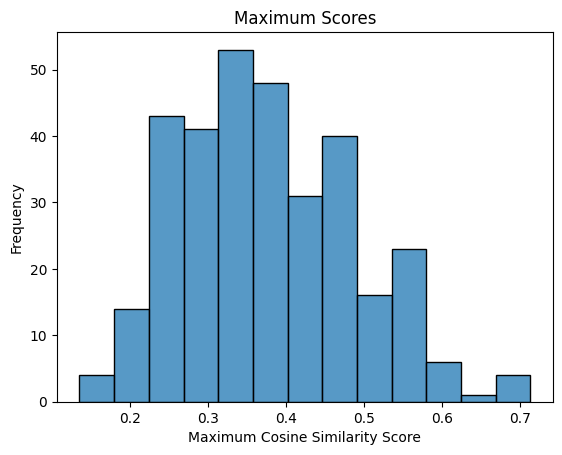

In [33]:
# Histogram of the maximum cosine similarity scores
def histogram(df,feature,xlab,title):
    hist = sns.histplot(df[feature])
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel('Frequency')

h = histogram(df, 'max_score','Maximum Cosine Similarity Score','Maximum Scores')

In [56]:
# Find top 5 videos with highest average scores
def get_top5(df, feature):
    top5 = df.iloc[:5]
    video_ids =[]
    for index, row in top5.iterrows():
        print("**********************************************************************")
        print(f"\nVideo ID: {row['video_id']}")
        video_ids.append(row['video_id'])
        print(f"\nVideo\'s {feature}: {row[feature]}")
        print(f"\nDate watched: {row['date']}")
        print(f"\nTop 5 similarities:")
        for sim in row['similarities_lst'][:5]:
            print(sim)
    return video_ids
            
top5_video_ids = get_top5(df,'video_description')

**********************************************************************

Video ID: 7338586099721309471

Video's video_description: Wendy Williams, 59, has been diagnosed with primary progressive #aphasia and frontotemporal #dementia. The conditions affect language, communication behavior and function. #news #health #wendywilliams 

Date watched: 2024-02-22

Top 5 similarities:
(0.7127, 'Wendy Williams Has Frontotemporal Dementia and Aphasia, Representatives Say')
(0.3571, 'On the Road With ‘The Outsiders,’ Where the Greasers and Socs Rumbled')
(0.303, 'The Best Bakeries Embrace Sweet and Savory')
(0.2835, 'Navalny and the Mirage of a Different Russia')
(0.2535, 'What to Know About the HPV Vaccine and Cancer Prevention')
**********************************************************************

Video ID: 7310306395105037598

Video's video_description: Honestly though loved the movie #saltburn #oscars #barrykeoghan #filmtok #movie 

Date watched: 2023-12-08

Top 5 similarities:
(0.7071, 'The

In [45]:
# Cosine similarity functions
import numpy as np
from numpy.linalg import norm
import string

def getVocabulary(textchunk):
    """Given some text, create the vocabulary of unique words."""
    textchunk = textchunk.lower()
    cleantext = "".join(char for char in textchunk if char not in string.punctuation)
    words = set(cleantext.split())
    voc = sorted(words)
    return voc

def text2vector(sentence, voc):
    """Given a sentence and the vocabulary for the problem,
    turn every sentence into a vector.
    """
    cleantext = "".join(char for char in sentence if char not in string.punctuation)
    words = cleantext.lower().split()
    vector = [words.count(w) for w in voc]
    return vector

def cosineSimilarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    V1 = np.array(vec1)
    V2 = np.array(vec2)
    cosine = np.dot(V1, V2)/(norm(V1)*norm(V2))
    return cosine


Wendy Williams, 59, has been diagnosed with primary progressive #aphasia and frontotemporal #dementia. The conditions affect language, communication behavior and function. #news #health #wendywilliams 
(0.7127, 'Wendy Williams Has Frontotemporal Dementia and Aphasia, Representatives Say')
(0.3571, 'On the Road With ‘The Outsiders,’ Where the Greasers and Socs Rumbled')
(0.303, 'The Best Bakeries Embrace Sweet and Savory')
(0.2835, 'Navalny and the Mirage of a Different Russia')
(0.2535, 'What to Know About the HPV Vaccine and Cancer Prevention')
(0.2535, 'This Sesame Chicken With Cashews and Dates Is ‘Crazy Delicious’')
(0.2315, 'DeSantis, in Private Call, Sounds Off on Trump and Conservative News Media')
(0.2143, 'The Internet Is Obsessed With ‘Madame Web.’ The Box Office? Well …')
(0.202, 'Homes for Sale in Manhattan and Brooklyn')
(0.189, '‘Avatar: The Last Airbender’: Been There, Saved That')


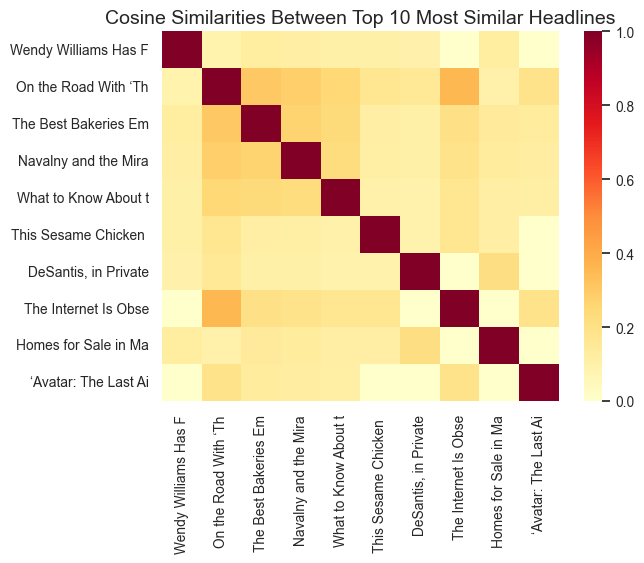

In [59]:
# Create a heatmap of the cosine similarities 
# between the top n news headlines
def drawHeatmap(sentLabels, simMtrx, plotTitle):
    """Draws a heatmap for the similarity matrix.
    """
    sns.set(font_scale=0.9)
    g = sns.heatmap(
          simMtrx, # similarity matrix with the cosine sim values
          xticklabels=sentLabels,
          yticklabels=sentLabels,
          vmin=0,
          vmax=1,
          cmap="YlOrRd")
    g.set_xticklabels(sentLabels, rotation=90)
    g.set_title(plotTitle, fontsize=14)
    plt.show()

def get_top_n_headlines(df,video_id,n,feature):
    # Get the top n headlines for video
    video = df[df['video_id']==video_id].iloc[0]
    feature_text = video[feature]
    top_n_similarities = video['similarities_lst'][:n]
    top_n_headlines = video['headlines_lst'][:n]
    
    # Create vocabulary for all headlines
    all_headlines_str = " ".join(top_n_headlines)
    voc = getVocabulary(all_headlines_str)
    
    # Convert sentences to vectors
    headline_vecs = [text2vector(headline, voc) for headline in top_n_headlines]
    
    sim_matrix = []
    for vec1 in headline_vecs:
        sim_row = []
        for vec2 in headline_vecs:
            sim_row.append(cosineSimilarity(vec1, vec2))
        sim_matrix.append(sim_row)
    
    return sim_matrix, top_n_headlines,feature_text, top_n_similarities


video_id =7338586099721309471
feature = "video_description"
n = 10
sim_matrix, top_n_headlines,feature_text,top_n_similarities = get_top_n_headlines(df,video_id,n,feature)
headline_labs = [headline[:20] for headline in top_n_headlines]
title = f'Cosine Similarities Between Top {n} Most Similar Headlines'
print(feature_text)
for sim in top_n_similarities:
    print(sim)
drawHeatmap(headline_labs,sim_matrix,title)

## Function to Do Everything

In [62]:
def complete_analysis(filename,feature):
    data = load_data(filename)
    explore_data(data)
    df = transform_df(data)
    print("\n*****TOP 5 ANALYSIS*****")
    top5_video_ids = get_top5(df,'video_description')
    
    print("\n*****HEATMAPS COMPARING MOST SIMILAR HEADLINES*****")
    for vid_id in top5_video_ids:
        feature = "video_description"
        n = 10
        sim_matrix, top_n_headlines,feature_text, top_n_similarities = get_top_n_headlines(df,vid_id,n,feature)
        headline_labs = [headline[:20] for headline in top_n_headlines]
        title = f'Cosine Similarities Between Top {n} Most Similar Headlines'
        print(feature_text)
        for sim in top_n_similarities:
            print(sim)
        drawHeatmap(headline_labs,sim_matrix,title)
        

Total Number of Rows: 381
Number of Unique Videos: 352

Number of Duplicates Rows (with same id and same date): 37

Duplicate Videos and Counts:
video_id             date      
7337716616479788331  2024-02-20    9
7201164179913329925  2023-02-17    4
7273349612067360006  2023-08-31    4
7217004941930499333  2023-04-01    4
7307016321995377966  2023-11-29    4
7338131827300846890  2024-02-21    4
7338586099721309471  2024-02-22    4
7338633087150181678  2024-02-22    4
Name: count, dtype: int64

After cleaning data...

Original Shape: (381, 13)
New Shape: (324, 13)
Num rows dropped: 57

Average of Max Similartiy Stats:
 count    324.000000
mean       0.376485
std        0.110423
min        0.134800
25%        0.288700
50%        0.365100
75%        0.447200
max        0.712700
Name: max_score, dtype: float64

*****TOP 5 ANALYSIS*****
**********************************************************************

Video ID: 7338586099721309471

Video's video_description: Wendy Williams, 59, has b

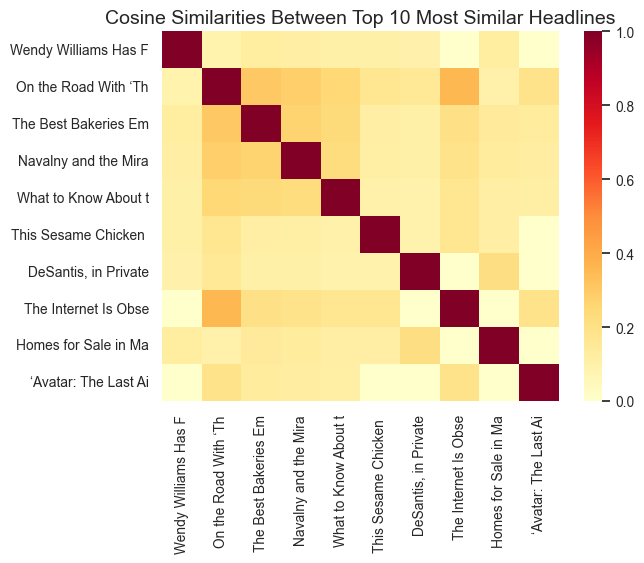

Honestly though loved the movie #saltburn #oscars #barrykeoghan #filmtok #movie 
(0.7071, 'The Weekender')
(0.6547, 'The New World Bank Leader Has the Climate Crisis at the Top of His Agenda')
(0.603, 'Berlin’s Subway Musical Captures the Soul of the City')
(0.5774, 'The Missing Piece of the Premier League’s TV Rights Deal')
(0.5774, 'The Connections Companion')
(0.5345, 'Is This the Year of the Bunk Bed? Some Designers Think So.')
(0.4714, 'Quotation of the Day: Hot Glazed Donuts on the Menu: For Parisians, How Sweet It Is.')
(0.4472, 'Word of the Day: placid')
(0.4472, 'The Year in ‘Sensitive Content’')
(0.4472, 'The Race to Dominate A.I.')


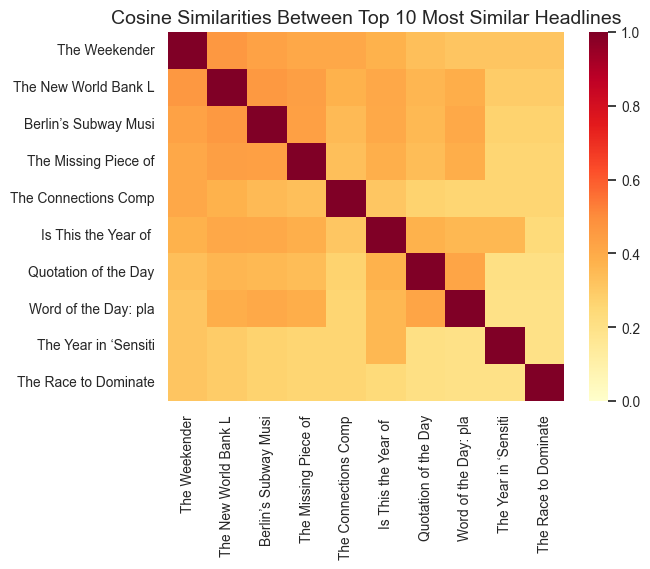

The Tanis Site (repost) #sciencetok #science #dinosaur #extinction #learnontiktok #edutok #stem #paleontology #discovery #tanis #evolution #animal #biology #ancient #history 
(0.6708, 'The Mostest for the Hostess: The Joy of Vintage Guides to Throwing a Party')
(0.603, 'Did the Grinch Come for the Office Holiday Party?')
(0.5774, 'The Connections Companion')
(0.378, 'Why Democracy Hasn’t Settled the Abortion Question')
(0.378, 'The Sunday Read: ‘Bariatric Surgery at 16’')
(0.378, 'Lessons From the Past Year of Wordle')
(0.3333, 'A Photographer in Pursuit of the Moments Between Fires')
(0.3162, 'The New York Times 2023 Mega Crossword Contest Official Rules')
(0.3162, 'Powerful Storm Lashes the East Coast With Wind and Rain')
(0.3162, 'Germans Elect Far-Right City Mayor, a Boost for the AfD')


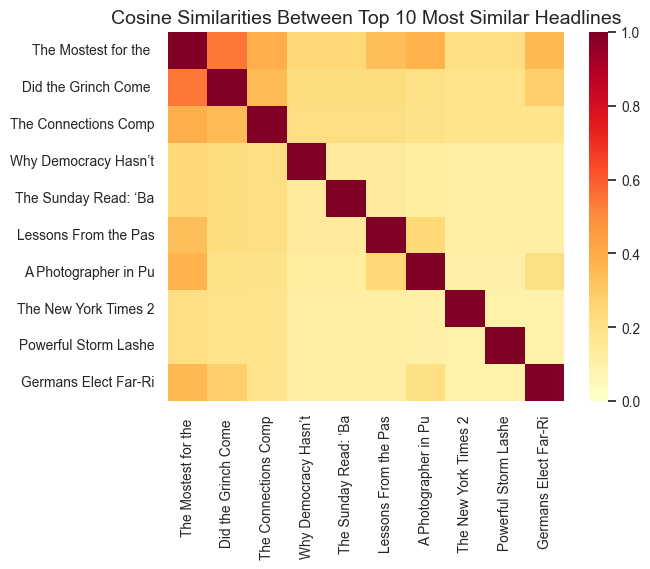

Replying to @Arum Natzorkhang The Toaster project! #learnontiktok #science #learneclecticthings 
(0.6708, 'The Latest Challenge to the Voting Rights Act')
(0.6124, 'Behind the Plan to Eliminate the Deer on Catalina Island')
(0.5345, 'Jon Fosse Wants to Say the Unsayable')
(0.5, '‘Our Son’ Review: The Right to Break Up')
(0.4714, 'The College Presidents and the ‘Genocide’ Question')
(0.4629, '‘Leave the World Behind’ Review: It’s the End of the World, I Guess')
(0.4472, 'Lighting the Menorah Under the Shadow of War')
(0.4264, 'The Best Movies and TV Shows Coming to Netflix in December')
(0.4264, 'In Building the Future, a Blueprint From the Past')
(0.4264, 'How Converting N.Y.C. Office Buildings to Homes Can Help the Environment')


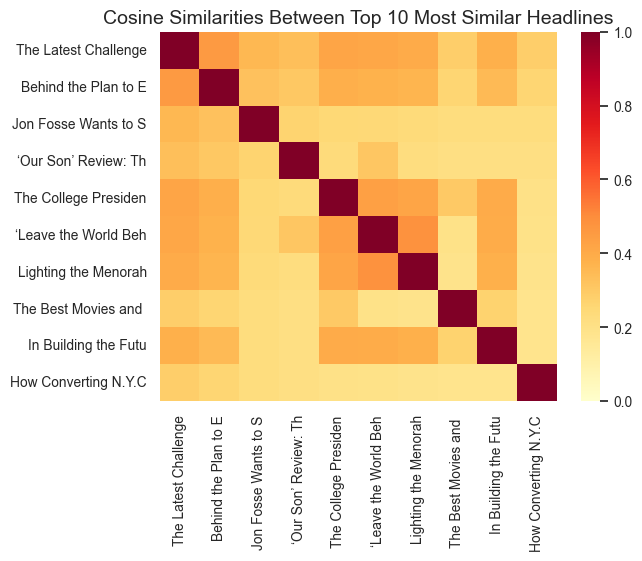

#stitch with @QBSkiiii Let’s talk about the COVID Learning Gap chile! #Teacher #highschool #pandemic 
(0.6455, 'Enough About the Serial Killer. Let’s Talk About His Victims.')
(0.3162, 'The Kids on the Night Shift')
(0.3162, 'The Girlies Know: ‘Oppenheimer’ Was Actually About Us')
(0.2981, 'Here’s what to know about the U.N. General Assembly.')
(0.2828, 'A Sustainable House With ‘a Tree Growing in the Middle’')
(0.2582, 'The London Lowdown')
(0.2582, 'The Burberry Blues')
(0.2236, 'The Restaurant List 2023')
(0.2236, 'The Essential J.M. Coetzee')
(0.2236, 'Head in the Clouds')


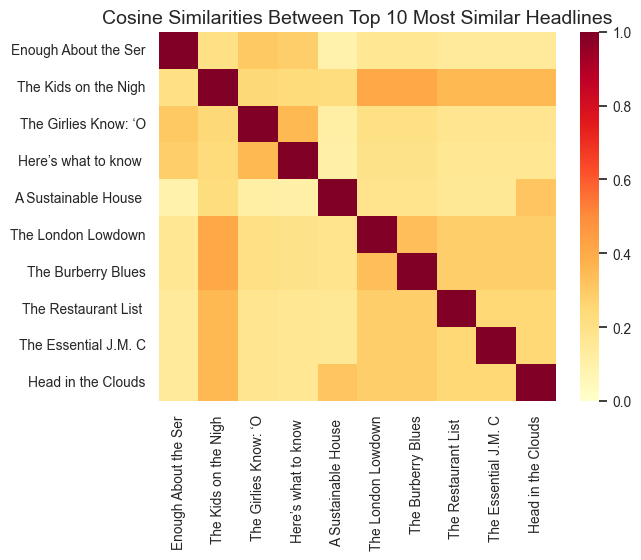

In [63]:
filename = "cosine_sim_video_description_12345.csv"
feature = "video_description"

complete_analysis(filename,feature)